<a href="https://colab.research.google.com/github/dizzySummer/statistics/blob/main/exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
library(tidyverse)

In [7]:
cats<-read_tsv("/content/cats.txt")
head(cats)

Parsed with column specification:
cols(
  Name = col_character(),
  Breed = col_character(),
  Sex = col_character(),
  Neutered = col_character(),
  Age = col_double(),
  Weight = col_double()
)



Name,Breed,Sex,Neutered,Age,Weight
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Messi,Domestic short-haired,male,yes,1,5.2
Forlan,Domestic short-haired,male,yes,1,5.3
Galadriel,Domestic short-haired,female,yes,3,3.3
Gandalf,Domestic short-haired,male,yes,3,3.3
Idun,Domestic short-haired,female,no,6,5.5
Polly,Domestic short-haired,female,yes,7,3.2


In [8]:
yield<-read.csv2("/content/yield.csv")
head(yield)

,field,variety,yield
,<int>,<int>,<int>
1,1,1,35
2,2,1,62
3,3,1,19
4,4,1,34
5,5,1,72
6,6,1,52


**2. Expressions, transformations and new variables and filtering in R**

The common arithmetic operators +, -, * and / are available as well as common mathematical functions likeexp, sqrt and log (which denotes the natural logarithm). Exponents are computed ˆ.New variables or datasets (data.frames or tibbles) are assigned using<-or->, e.g.

In [9]:
cats1<-cats%>%mutate(logWeight=log(Weight))

Remember that new classes can be made by:

In [10]:
cats_new <- cats%>%
mutate(Ageclass=case_when(Age<4~"<4",
                          Age>=4 & Age<7~"4-6",
                          Age>=7 & Age<10~"7-9",
                          Age>=10~">9"))

In [11]:
t.test(cats$Weight, mu=5)
# or in tidyverse notation: cats%>%t.test(.$Weight, data=., mu=5)


	One Sample t-test

data:  cats$Weight
t = -3.1019, df = 56, p-value = 0.00301
alternative hypothesis: true mean is not equal to 5
95 percent confidence interval:
 4.156882 4.818557
sample estimates:
mean of x 
 4.487719 


Q.

*  b)  What is the hypothesis we have tested above?
* c)  What are the conclusions we can draw from the test outout?
* d)  How can the p-value be used to make conclusions in a statistical test?
* e)  A 95% confidence interval is also given in the output. What does a 95% 
confidence interval stand for? 
* f)  Can you draw the conclusion in c) also by the confidence interval? How?


  



A. Some answers:R calculates and presents the value of the test statistic t = -3.1019, which you can compare with the appropriate percentile from a t-distribution table as we’ve done in class. However, since R also calculates the p-value, you do not need to do that. You just compare the p-value with the desired significancelevel and you’re done.In this case, we can reject the null hypothesis since the p-value is below 0.05 and we can conclude that the mean of the cats’ weight is significantly different from 5 (in fact it is lower). The output also automatically provides a confidence interval with the confidence level provided. Note that you get a double-sided confidence interval since the test is a double sided test. Using a one-sided test one of the confidence interval’s boundswould be infinity (Inf).




Checking assumptionsT-tests are valid if the conditions/assumptions for them are fullfilled. Here we have collected a random sample of cats and the observations are therefore independent. We also need to ensure that data is normal distributed or if the dataset is large enough to assume normality for the mean bythe central limit theorem.To check if a sample is normally distributed, you can either look at a histogram

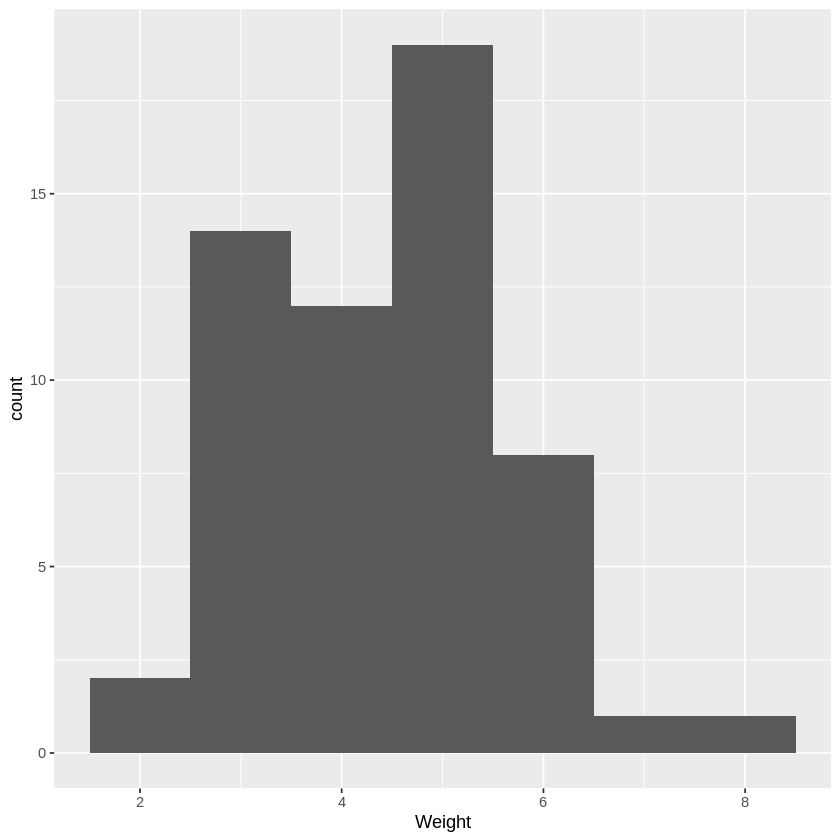

In [12]:
cats%>%ggplot(aes(Weight))+geom_histogram(binwidth=1) #Default values are mu=0,alternative="two.sided"and conf.level=0.95

Note: The impression of a histogram depends a lot on the bin width and the number of bins. Change the bin width to get another plot 

**Normal probability plots are usually better to check the distribution**

In [ ]:
cats%>%ggplot(aes(sample=Weight))+stat_qq()+stat_qq_line()

The observations should line up in a straight line if the sample is normally distributed. These are merely graphical methods and therefore subjective, but they give an easy way to check your distribution. A little practice will make you trained to see which deviations are so strong that normality is not a good choice anymore. In this case, there does not seem to be any strong evidence against the assumption of the normal distribution.

The QQplot can also be obtained by this #If you are running R Markdown code this code might not work with an error message “plot.new has not been called”. In that case set{}around the two lines.

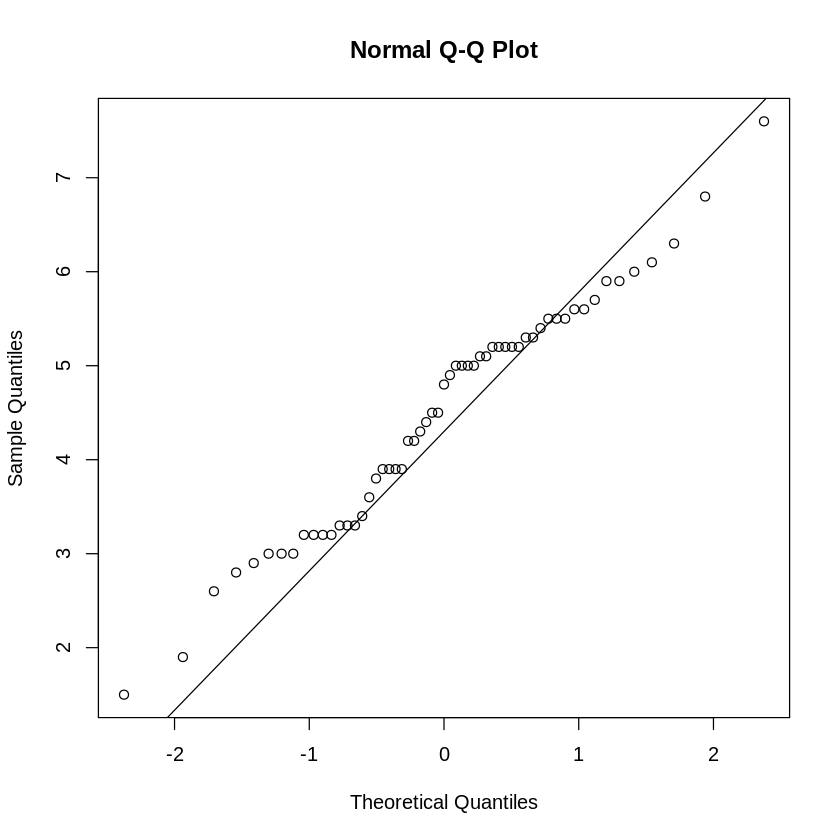

In [14]:
qqnorm(cats$Weight)
qqline(cats$Weight)

**3.2 Wilcoxon’s signed rank test**

If you have a small non-normal sample, you should use a non-parametric test and in the one-sample case the Wilcoxon’s signed rank test is the most powerful. The function you use to do this is called wilcox.test(...)and is used in almost exactly the same way ast.test(...)with the same options and default values.The principal difference between a t-test and the Wilcoxon test is that the former deals with the mean and the latter with the median, but as long as the underlying distribution is symmetric they coincide. Another difference is that this function does not produce a confidence interval unless you specify that with the option conf.int=TRUE.


In [15]:
wilcox.test(cats$Weight,mu=5,conf.int=TRUE)


	Wilcoxon signed rank test with continuity correction

data:  cats$Weight
V = 407, p-value = 0.006371
alternative hypothesis: true location is not equal to 5
95 percent confidence interval:
 4.100064 4.800040
sample estimates:
(pseudo)median 
      4.449943 


g) Check to see that the results are similar to the t-test in this case.   Note: The value V in the output is the same as S+ that often is used in litterature.

In [16]:
t.test(cats$Weight, mu=5) #similar but not exact same? This is mean


	One Sample t-test

data:  cats$Weight
t = -3.1019, df = 56, p-value = 0.00301
alternative hypothesis: true mean is not equal to 5
95 percent confidence interval:
 4.156882 4.818557
sample estimates:
mean of x 
 4.487719 


**3.3 Exercise:**

Do the same analysis as above using the age of the cats as the variable of interest:
* h) Do a t-test to test if the mean age is significantly larger than 4.
* i) Look at the histogram and probability plots (qqplots) and determine if the observations follow a normaldistribution.
* j) Determine if it is better to use the t-test or the Wilcoxon’s signed rank test for these data.
* k) Conduct the Wilcoxon’s test (independently of your decision on if it is necessary or not) and comparethe results with those from the t-test.

In [18]:
#h t.test(cats$Age, mu=5)

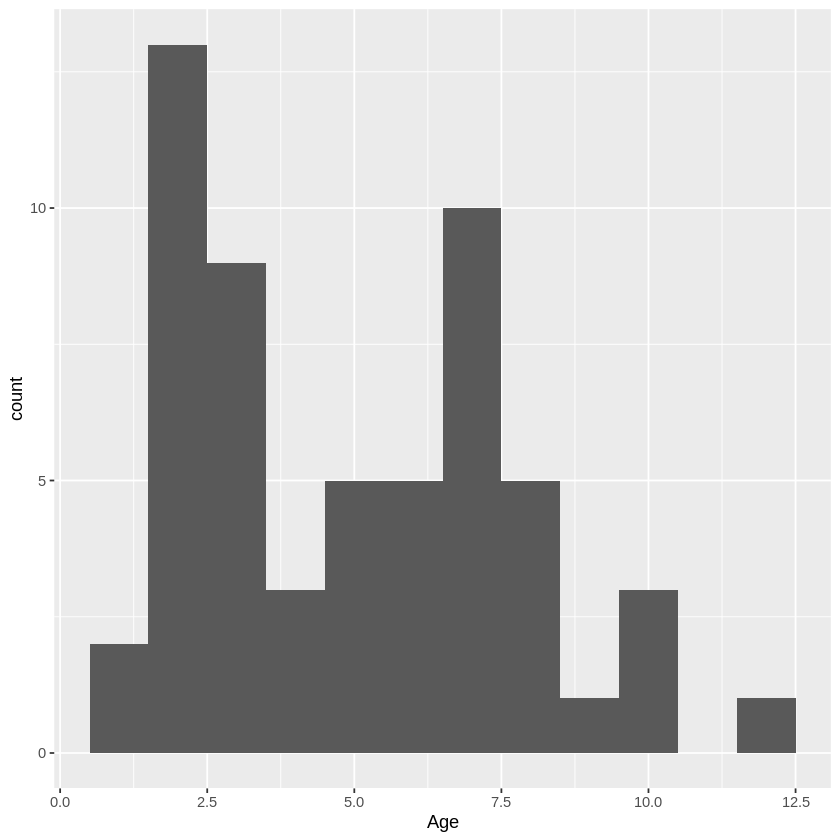

In [19]:
#i  answer No 
cats%>%ggplot(aes(Age))+geom_histogram(binwidth=1) 

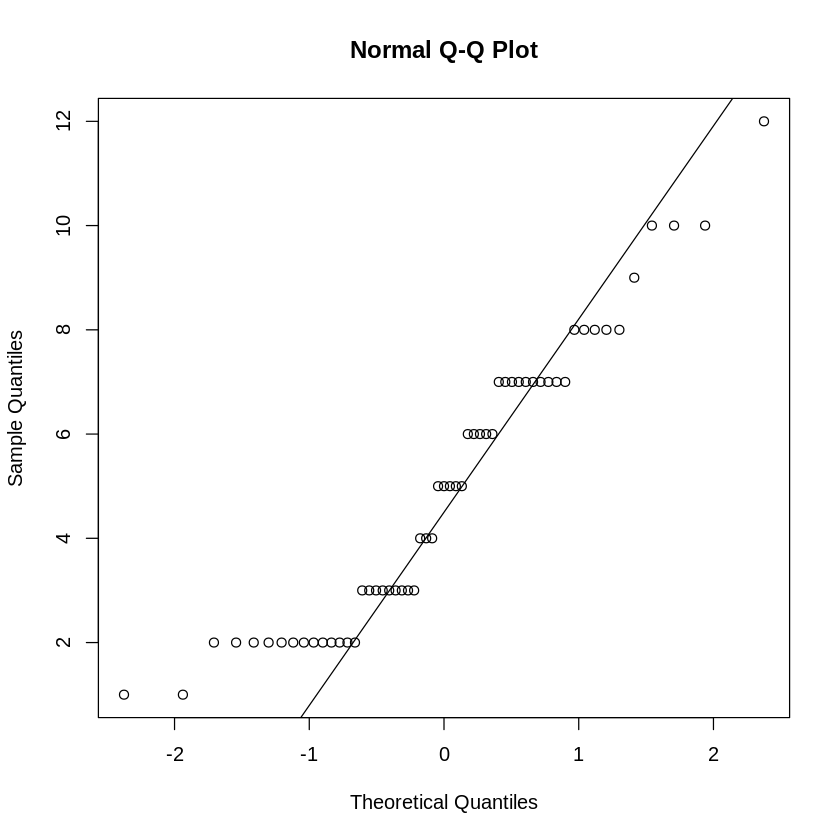

In [20]:
qqnorm(cats$Age)
qqline(cats$Age)

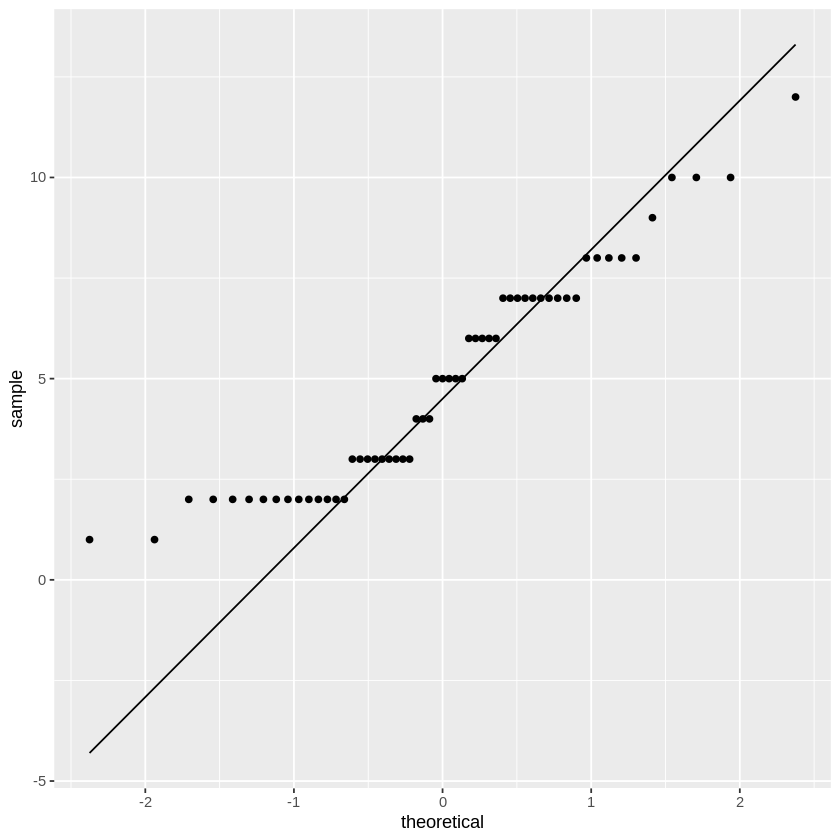

In [21]:
cats%>%ggplot(aes(sample=Age))+stat_qq()+stat_qq_line()

In [22]:
#j. Answer yes, it 's necessary
wilcox.test(cats$Age,mu=5,conf.int=TRUE)


	Wilcoxon signed rank test with continuity correction

data:  cats$Age
V = 634, p-value = 0.6156
alternative hypothesis: true location is not equal to 5
95 percent confidence interval:
 4.499969 5.500051
sample estimates:
(pseudo)median 
      4.999986 


In [23]:
#compare the result from t.test. ref: https://uc-r.github.io/t_test  http://www.sthda.com/english/wiki/one-sample-t-test-in-r
t.test(cats$Age, mu=5)


	One Sample t-test

data:  cats$Age
t = -0.096969, df = 56, p-value = 0.9231
alternative hypothesis: true mean is not equal to 5
95 percent confidence interval:
 4.240054 5.689771
sample estimates:
mean of x 
 4.964912 



 **4 Two-sample inference**
 
 **4.1 Two-sample t-test**

Also two-sample t-test are run with thet.test()function, e.g.

In [24]:
t.test(Weight~Sex, data=cats) # note P value


	Welch Two Sample t-test

data:  Weight by Sex
t = -6.7536, df = 52.236, p-value = 1.198e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.169501 -1.175685
sample estimates:
mean in group female   mean in group male 
            3.607407             5.280000 


A two-sample t-test tests if the difference between two population means is significantly different from 0(μ= 0). A two-sided alternative is used and the produced confidence interval has a 95% confidence level.Note that R, by default, carries out Welch’s t-test assuming the variances in the two groups are unequal. Ifyou want the standard t-test using a common pooled variance you have to add the optionvar.equal=TRUE.

In [25]:
t.test(Weight~Sex, data=cats, var.equal=TRUE)


	Two Sample t-test

data:  Weight by Sex
t = -6.7985, df = 55, p-value = 8.063e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.165632 -1.179553
sample estimates:
mean in group female   mean in group male 
            3.607407             5.280000 


Checking assumptionsQQplots need to be made for each of the samples separately. Either by

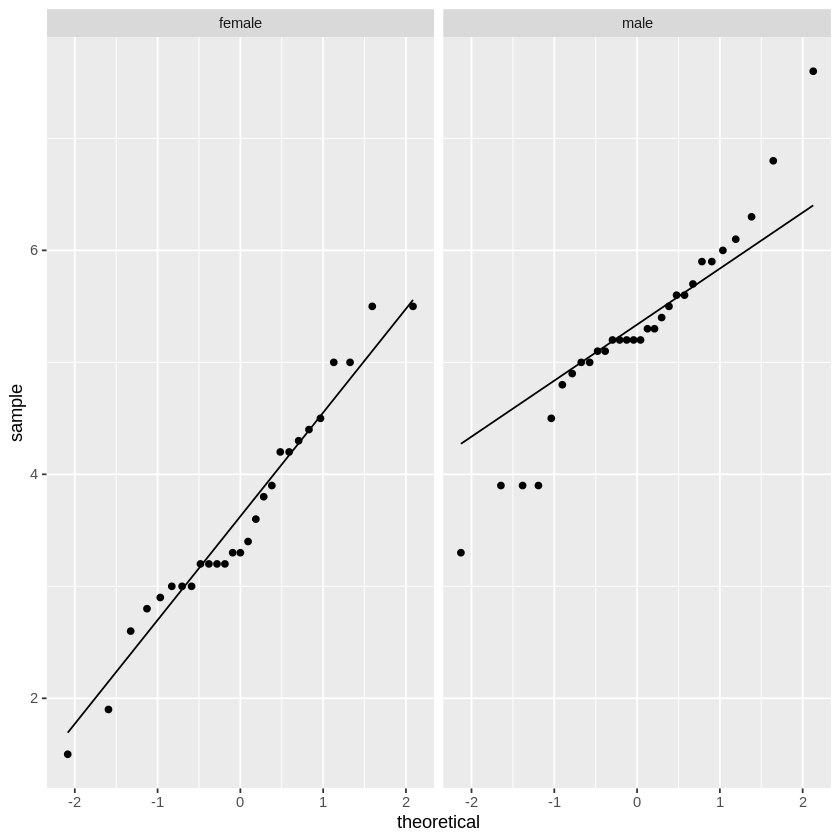

In [26]:
cats %>%
ggplot(aes(sample=Weight))+
stat_qq()+
stat_qq_line()+
facet_wrap(~Sex)

or using

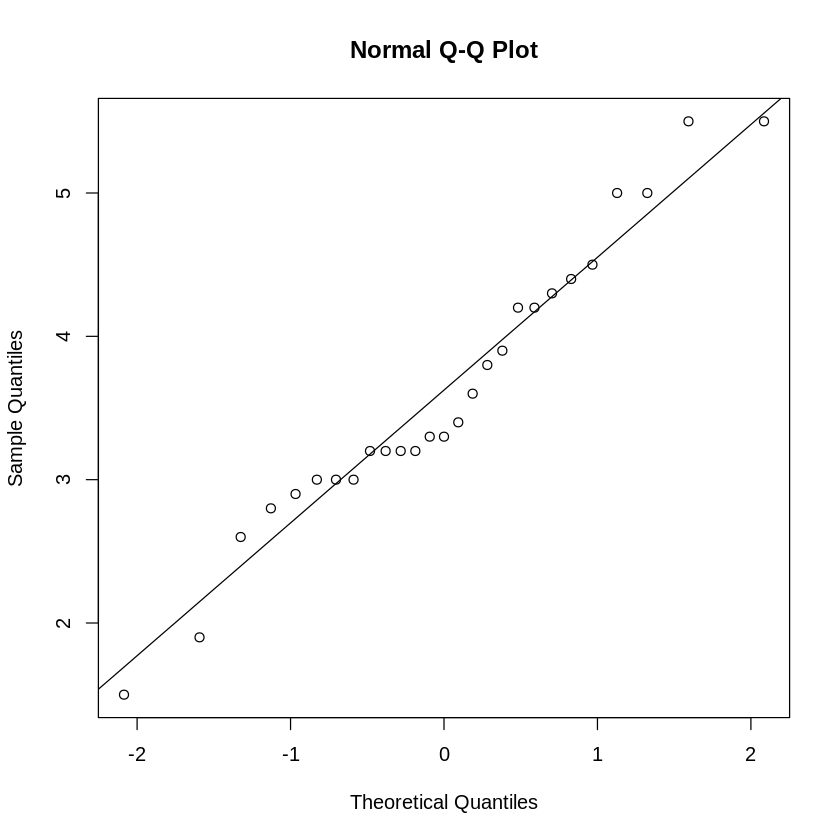

In [27]:
catsF<-cats%>%filter(Sex=="female")
qqnorm(catsF$Weight)
qqline(catsF$Weight)

**4.2 Wilcoxon’s rank sum test**

Again, the function wilcox.test(...) works almost exactly in the same way as t.test(...) except that
you do not need to include the option var.equal= since the Wilcoxon rank sum test does not require any
assumption about the variances.
* l) Conduct a test comparing the weight of cats for the two sexes without 
assuming normality and draw
conclusions.

In [41]:
catsF<-cats %>%
filter(Sex=="female")

catsM<-cats %>%
filter(Sex=="male")

In [60]:
wilcox.test(catsM$Weight, mu=5,conf.int=TRUE) # Check out

Warning message in wilcox.test.default(catsM$Weight, mu = 5, conf.int = TRUE):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(catsM$Weight, mu = 5, conf.int = TRUE):
“cannot compute exact confidence interval with ties”
Warning message in wilcox.test.default(catsM$Weight, mu = 5, conf.int = TRUE):
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(catsM$Weight, mu = 5, conf.int = TRUE):
“cannot compute exact confidence interval with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  catsM$Weight
V = 289, p-value = 0.05118
alternative hypothesis: true location is not equal to 5
95 percent confidence interval:
 5.000051 5.600004
sample estimates:
(pseudo)median 
      5.300059 


In [42]:
#t.test(catsM$Weight, data=cats, var.equal=TRUE)


	One Sample t-test

data:  catsM$Weight
t = 33.197, df = 29, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 4.954708 5.605292
sample estimates:
mean of x 
     5.28 


In [43]:
t.test(catsF$Weight, data=cats, var.equal=TRUE)


	One Sample t-test

data:  catsF$Weight
t = 19.003, df = 26, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 3.217194 3.997621
sample estimates:
mean of x 
 3.607407 


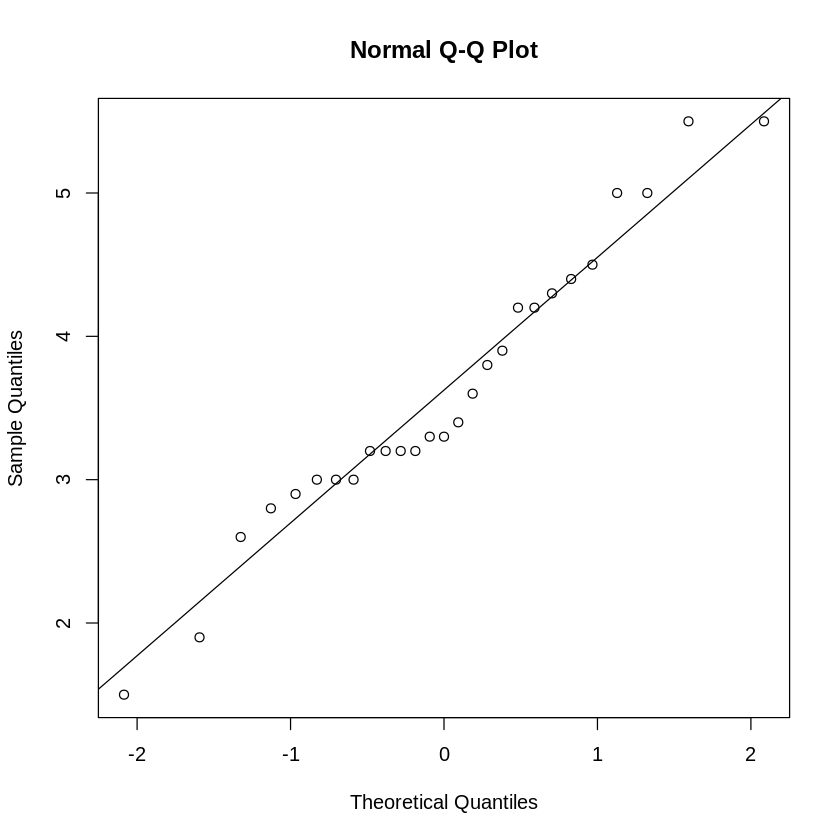

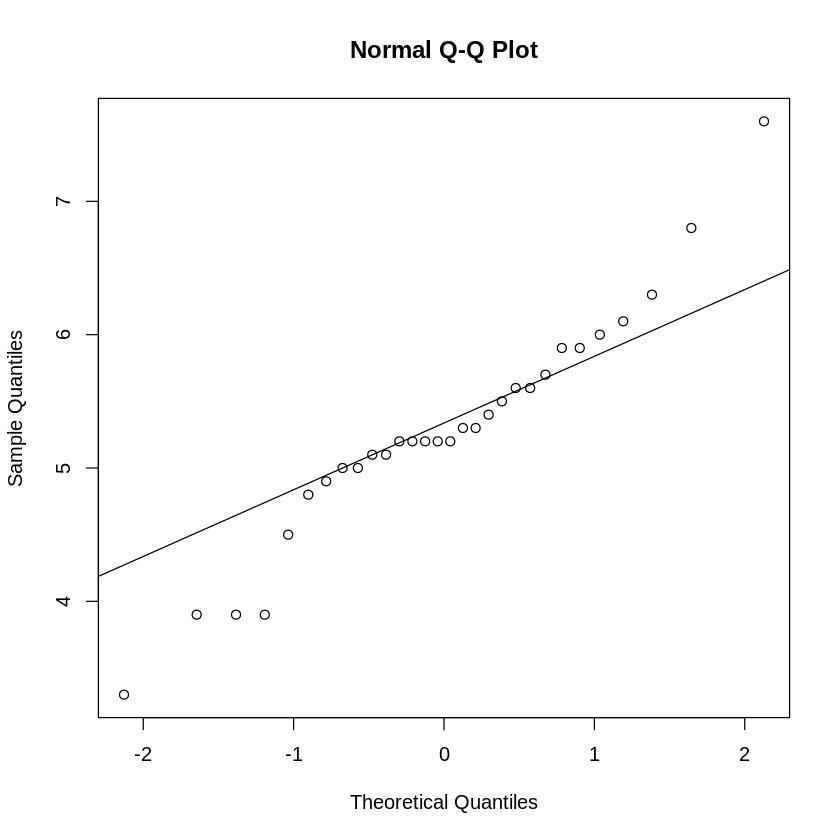

In [36]:
qqnorm(catsF$Weight)
qqline(catsF$Weight)

qqnorm(catsM$Weight)
qqline(catsM$Weight)

**4.3 Exercises**

* m) Make a t-test to determine if the average weight of the cats is significantly different for neutered and
non-neutered cats. Which conclusions can be drawn?
* n) Check the normality assumption for the test in m). Should a nonparametric method be used?
* o) Run the Wilcoxon’s rank sum test even if you have decided that it is not necessary.Draw conclusions.

In [50]:
#m)

catsNeu<-cats %>%
filter(Neutered=="yes")

catsNonNeu<-cats %>%
filter(Neutered=="no")

In [51]:
t.test(catsNeu$Weight, data=cats, var.equal=TRUE)


	One Sample t-test

data:  catsNeu$Weight
t = 29.022, df = 41, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 4.521362 5.197686
sample estimates:
mean of x 
 4.859524 


In [52]:
t.test(catsNonNeu$Weight, data=cats, var.equal=TRUE)


	One Sample t-test

data:  catsNonNeu$Weight
t = 12.216, df = 14, p-value = 7.437e-09
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 2.841524 4.051810
sample estimates:
mean of x 
 3.446667 


Conclusion: The neutered cats are heavier than non neutered cats. 

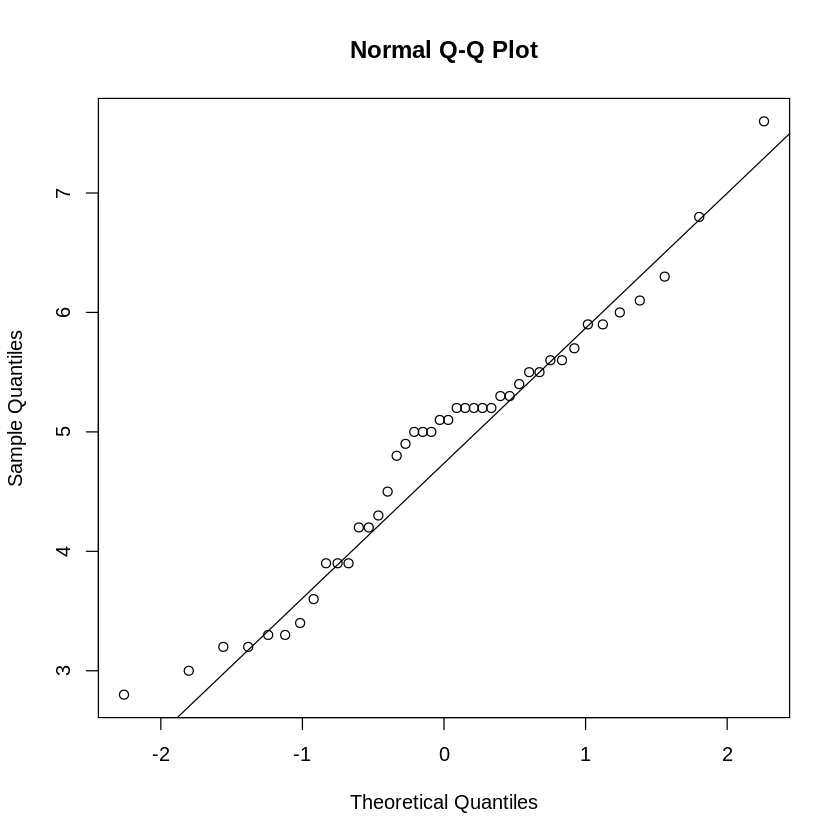

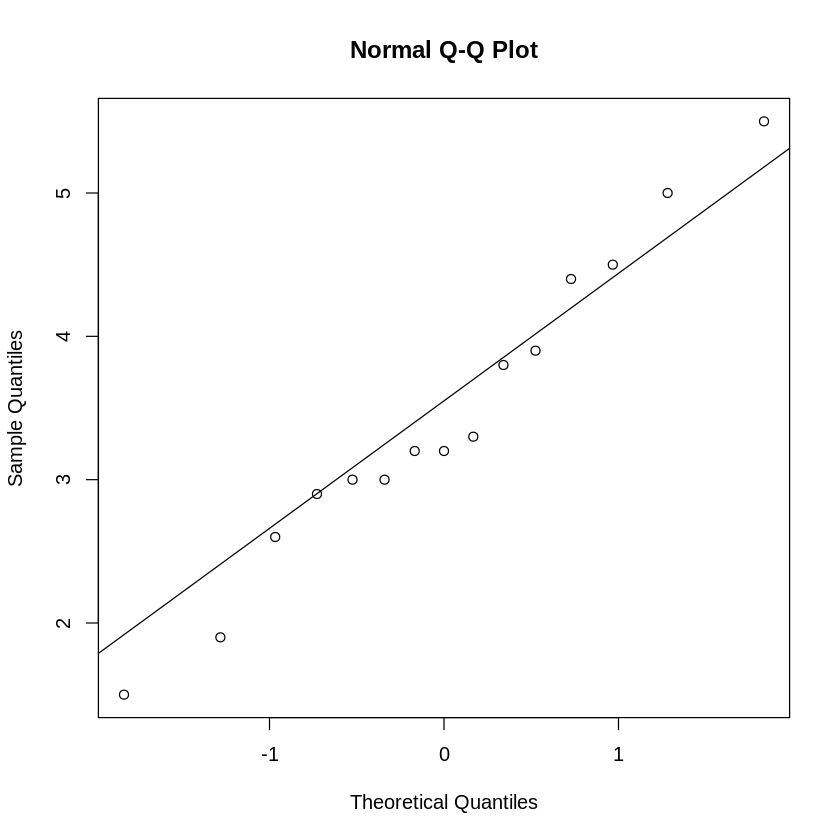

In [53]:
#n
qqnorm(catsNeu$Weight)
qqline(catsNeu$Weight)

qqnorm(catsNonNeu$Weight)
qqline(catsNonNeu$Weight)

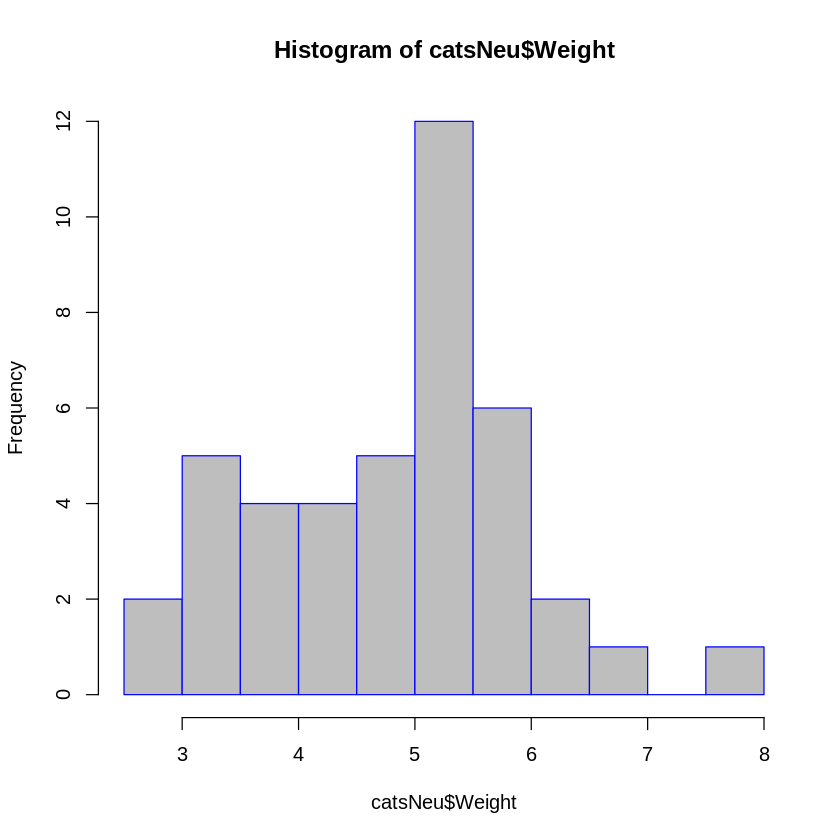

In [56]:
hist(catsNeu$Weight, border="blue", col="grey")

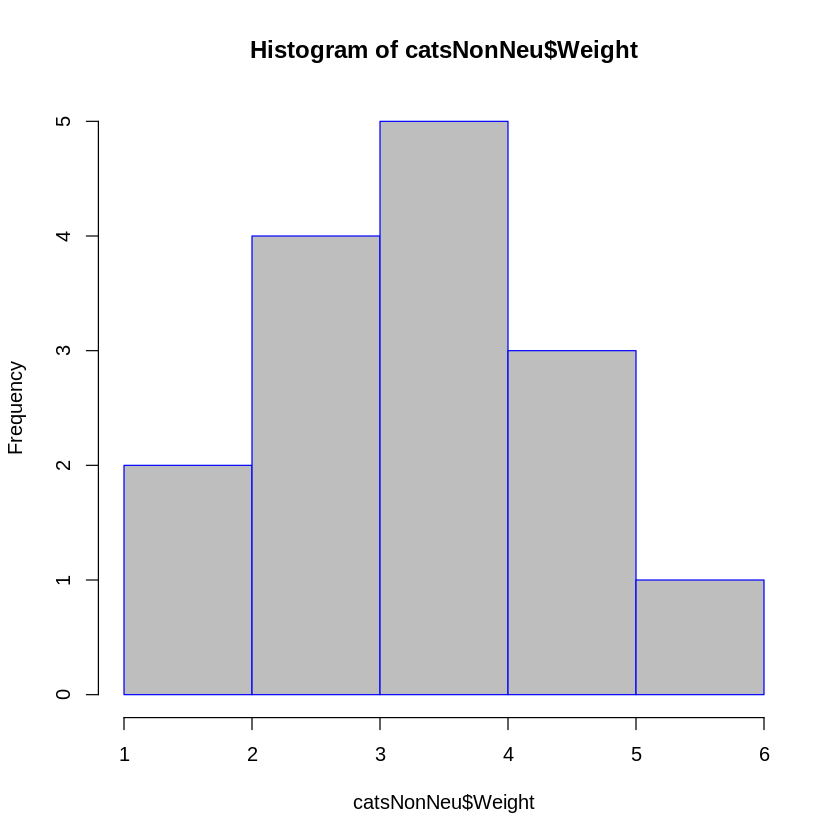

In [57]:
hist(catsNonNeu$Weight, border="blue", col="grey")

In [ ]:
#o) Run the Wilcoxon’s rank sum test even if you have decided that it is not necessary.Draw conclusions.